In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
adv = pd.read_csv('advertising.csv')

# kick off our data exploration journey

In [3]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


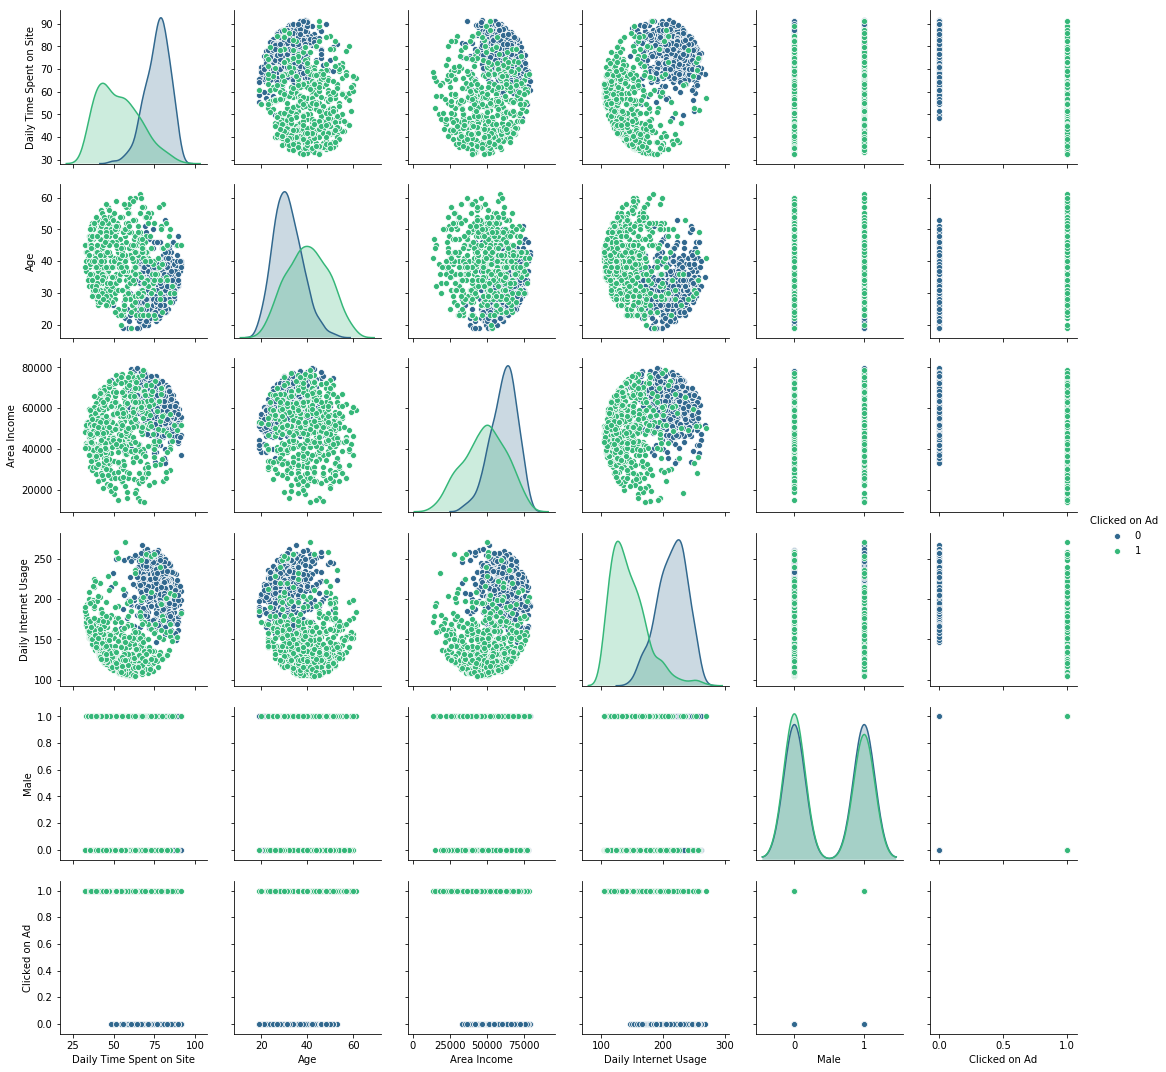

In [6]:
sns.pairplot(adv, hue='Clicked on Ad', palette='viridis')

# there is a lot of interesting things about the above graph include: 
## -'Clicked on Ad' Vs 'Male' : represented in only 4 points as the data falls in one of 4 options (clicked , male), (clicked, not male), (not clicked, male), ( not clicked, not male)
## - people from higher income, younger age and higher rate of internet usage are more likely to click on ads


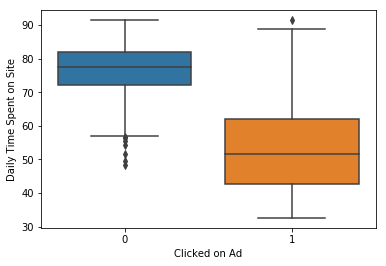

In [7]:
sns.boxplot('Clicked on Ad', 'Daily Time Spent on Site', data=adv)

# And here we have a counterintuitive insight which tells us that the more the user spend on the site the less he tends to click on ad

In [17]:
adv.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

# Removing irrelivant columns (we can feature engineer further more but this is out of this notebook scope)

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(adv.drop('Clicked on Ad', axis=1), adv['Clicked on Ad'], test_size=0.33, random_state=42)

In [13]:
log = LogisticRegression()

In [20]:
log.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
predictions = log.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(classification_report(y_test, predictions))
print()
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

   micro avg       0.91      0.91      0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330


[[156   6]
 [ 24 144]]
